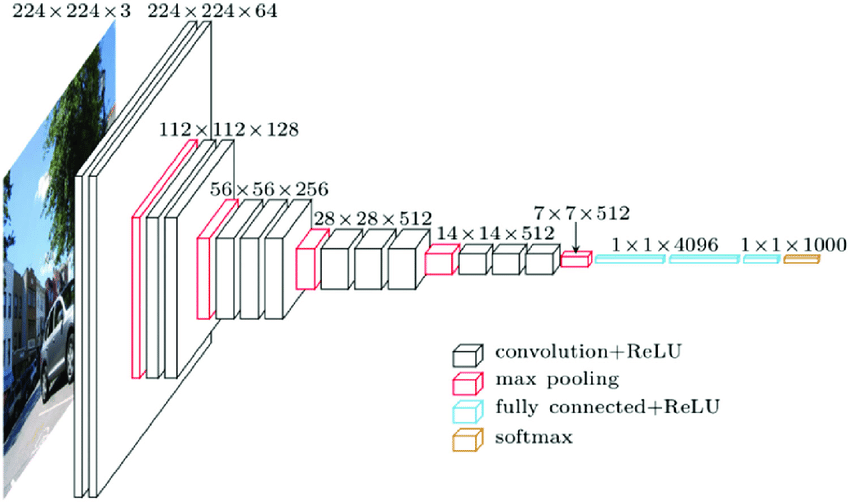

https://arxiv.org/pdf/1409.1556.pdf

Как работает свёртка:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/2D_Convolution_Animation.gif/330px-2D_Convolution_Animation.gif)

Max Pool 2d:

![](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

---

In [ ]:
import numpy as np

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from keras.layers import Dense
from keras.models import Model

import random

In [ ]:
# http://www.vision.caltech.edu/Image_Datasets/Caltech101/

import gdown

url = 'https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp'

output = '101_ObjectCategories.tar.gz'

s = gdown.download(url, output, quiet=False)
s

Downloading...
From: https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
To: /content/101_ObjectCategories.tar.gz
132MB [00:01, 81.4MB/s]


'101_ObjectCategories.tar.gz'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp drive/MyDrive/101_ObjectCategories.tar.gz .

In [ ]:
!tar -xzf 101_ObjectCategories.tar.gz

In [ ]:
!rm 101_ObjectCategories.tar.gz
!ls

101_ObjectCategories  sample_data


In [ ]:
!rm -rf 101_ObjectCategories

In [ ]:
import os

root = '101_ObjectCategories'
categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories

['101_ObjectCategories/stegosaurus',
 '101_ObjectCategories/buddha',
 '101_ObjectCategories/pigeon',
 '101_ObjectCategories/crab',
 '101_ObjectCategories/yin_yang',
 '101_ObjectCategories/grand_piano',
 '101_ObjectCategories/ibis',
 '101_ObjectCategories/anchor',
 '101_ObjectCategories/dalmatian',
 '101_ObjectCategories/kangaroo',
 '101_ObjectCategories/rhino',
 '101_ObjectCategories/emu',
 '101_ObjectCategories/lobster',
 '101_ObjectCategories/Leopards',
 '101_ObjectCategories/pyramid',
 '101_ObjectCategories/tick',
 '101_ObjectCategories/schooner',
 '101_ObjectCategories/saxophone',
 '101_ObjectCategories/sea_horse',
 '101_ObjectCategories/crocodile_head',
 '101_ObjectCategories/cup',
 '101_ObjectCategories/hawksbill',
 '101_ObjectCategories/revolver',
 '101_ObjectCategories/dragonfly',
 '101_ObjectCategories/strawberry',
 '101_ObjectCategories/ferry',
 '101_ObjectCategories/metronome',
 '101_ObjectCategories/scissors',
 '101_ObjectCategories/lotus',
 '101_ObjectCategories/starfish',

In [ ]:
categories = ['101_ObjectCategories/saxophone', '101_ObjectCategories/dolphin', '101_ObjectCategories/panda']
categories

['101_ObjectCategories/saxophone',
 '101_ObjectCategories/dolphin',
 '101_ObjectCategories/panda']

In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x    

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [ ]:
num_classes

3

In [ ]:
len(data)

143

In [ ]:
random.shuffle(data)
train_split = 0.8
idx_test = int((train_split) * len(data))

data_train = data[:idx_test]
data_test = data[idx_test:]

In [ ]:
len(data_train) + len(data_test) == len(data)

True

In [ ]:
x_train, y_train = np.array([t["x"] for t in data_train]), [t["y"] for t in data_train]
x_test, y_test = np.array([t["x"] for t in data_test]), [t["y"] for t in data_test]

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
 
# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [ ]:
model_new.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

In [ ]:
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model_new.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
12/12 [==============================] - 58s 5s/step - loss: 1.3553 - accuracy: 0.4919
Epoch 2/10
12/12 [==============================] - 57s 5s/step - loss: 1.1453 - accuracy: 0.5286
Epoch 3/10
12/12 [==============================] - 57s 5s/step - loss: 0.6222 - accuracy: 0.6794
Epoch 4/10
12/12 [==============================] - 61s 5s/step - loss: 0.4209 - accuracy: 0.8715
Epoch 5/10
12/12 [==============================] - 58s 5s/step - loss: 0.2743 - accuracy: 0.9668
Epoch 6/10
12/12 [==============================] - 58s 5s/step - loss: 0.3070 - accuracy: 0.9040
Epoch 7/10
12/12 [==============================] - 58s 5s/step - loss: 0.2473 - accuracy: 0.9107
Epoch 8/10
12/12 [==============================] - 58s 5s/step - loss: 0.1868 - accuracy: 0.9735
Epoch 9/10
12/12 [==============================] - 58s 5s/step - loss: 0.1746 - accuracy: 0.9685
Epoch 10/10
12/12 [==============================] - 58s 5s/step - loss: 0.1415 - accuracy: 0.9879


In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
img, x = get_image('/content/101_ObjectCategories/ant/image_0010.jpg')
probabilities = model_new.predict([x])
probabilities

In [ ]:
class Test:
  def __init__(self):
    self.a = 100

In [ ]:
t = Test()

In [ ]:
t.a

100

In [ ]:
def foo(t: Test):
  asd = t
  print(asd)

In [ ]:
foo(t)

In [ ]:
t